# Load necessary packages

In [1]:
library(caret)
library(kernlab)
library(ggplot2)
library(lattice)
library(randomForest)
library(ellipse)

Loading required package: ggplot2

Loading required package: lattice


Attaching package: ‘kernlab’


The following object is masked from ‘package:ggplot2’:

    alpha


randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:ggplot2’:

    margin



Attaching package: ‘ellipse’


The following object is masked from ‘package:graphics’:

    pairs




# Read CSV file

In [2]:
# attach the iris dataset to the environment
data(iris)
# rename the dataset
dataset <- iris

**use 80% of the data**

In [3]:
# create a list of 80% of the rows in the original dataset we can use for training
validation_index <- createDataPartition(dataset$Species, p=0.80, list=FALSE)
# select 20% of the data for validation
validation <- dataset[-validation_index,]
# use the remaining 80% of data to training and testing the models
dataset <- dataset[validation_index,]

**rows and columns**

In [4]:
dim(dataset)

[1] 120   5

**Determine type of data in Columnms**

In [6]:
sapply(dataset, class)

Sepal.Length  Sepal.Width Petal.Length  Petal.Width      Species 
   "numeric"    "numeric"    "numeric"    "numeric"     "factor"

# display data

In [7]:
head(dataset)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa
8,5.0,3.4,1.5,0.2,setosa
9,4.4,2.9,1.4,0.2,setosa


**Listing all of the categorical data values**

In [8]:
levels(dataset$Species)

[1] "setosa"     "versicolor" "virginica"

**Frequency of each flower species in the table**

In [9]:
percentage <- prop.table(table(dataset$Species)) * 100
cbind(freq=table(dataset$Species), percentage=percentage)

,freq,percentage
setosa,40,33.33333
versicolor,40,33.33333
virginica,40,33.33333


In [10]:
summary(dataset)

  Sepal.Length   Sepal.Width     Petal.Length    Petal.Width          Species  
 Min.   :4.30   Min.   :2.000   Min.   :1.000   Min.   :0.100   setosa    :40  
 1st Qu.:5.10   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300   versicolor:40  
 Median :5.70   Median :3.000   Median :4.200   Median :1.300   virginica :40  
 Mean   :5.81   Mean   :3.029   Mean   :3.727   Mean   :1.181                  
 3rd Qu.:6.40   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800                  
 Max.   :7.70   Max.   :4.400   Max.   :6.900   Max.   :2.500                  

**separating the numerical and factor values in the dataset**

In [11]:
x <- dataset[,1:4]
y <- dataset[,5]

# creating a boxplot of each column with numerical data

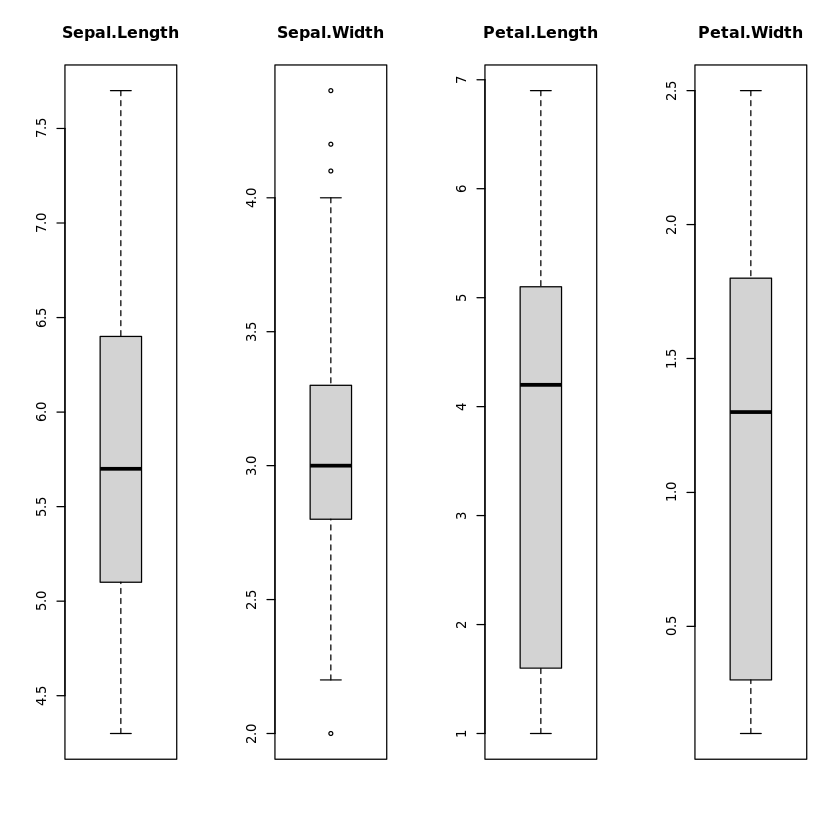

In [12]:
par(mfrow=c(1,4))
  for(i in 1:4) {
  boxplot(x[,i], main=names(iris)[i])
}

**again shows equal freqency of each flower species**

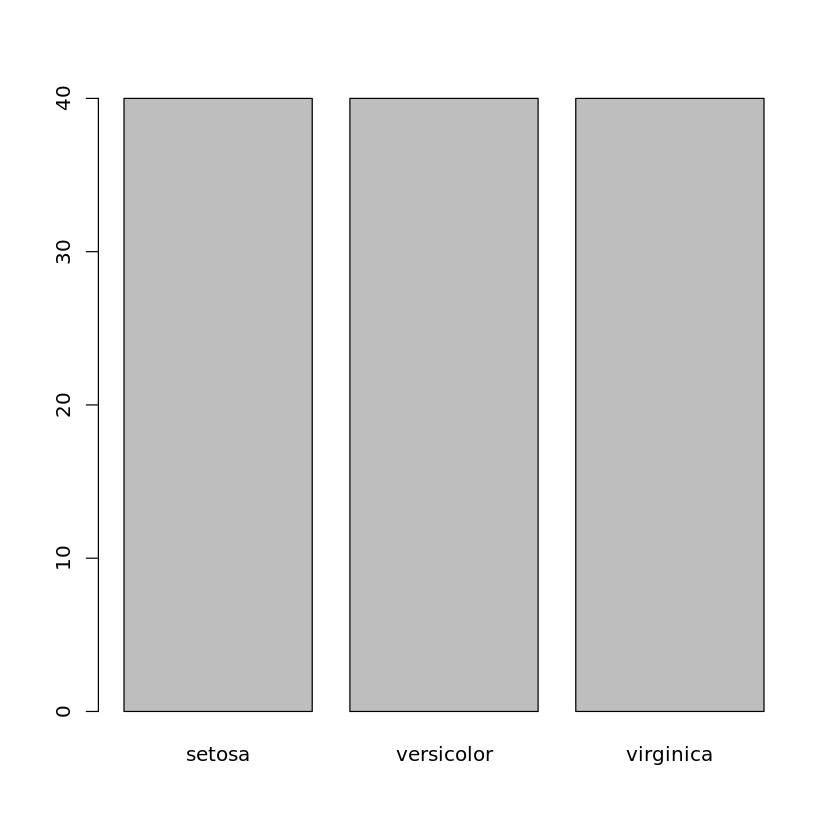

In [13]:
plot(y)

# Comparitive analysis of all varialbes 

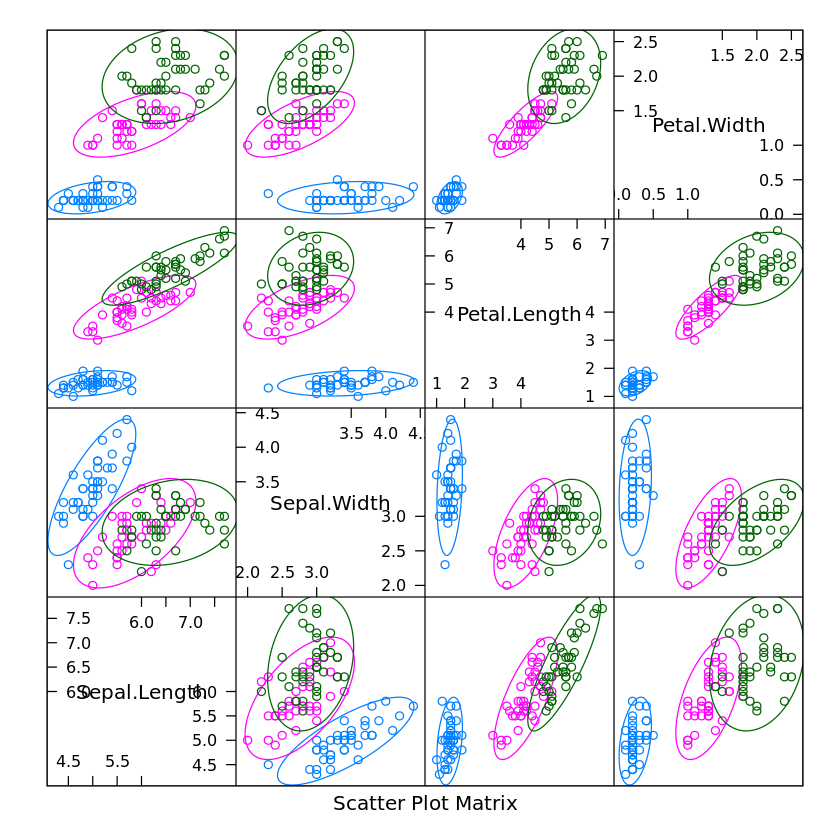

In [14]:
featurePlot(x=x, y=y, plot="ellipse")

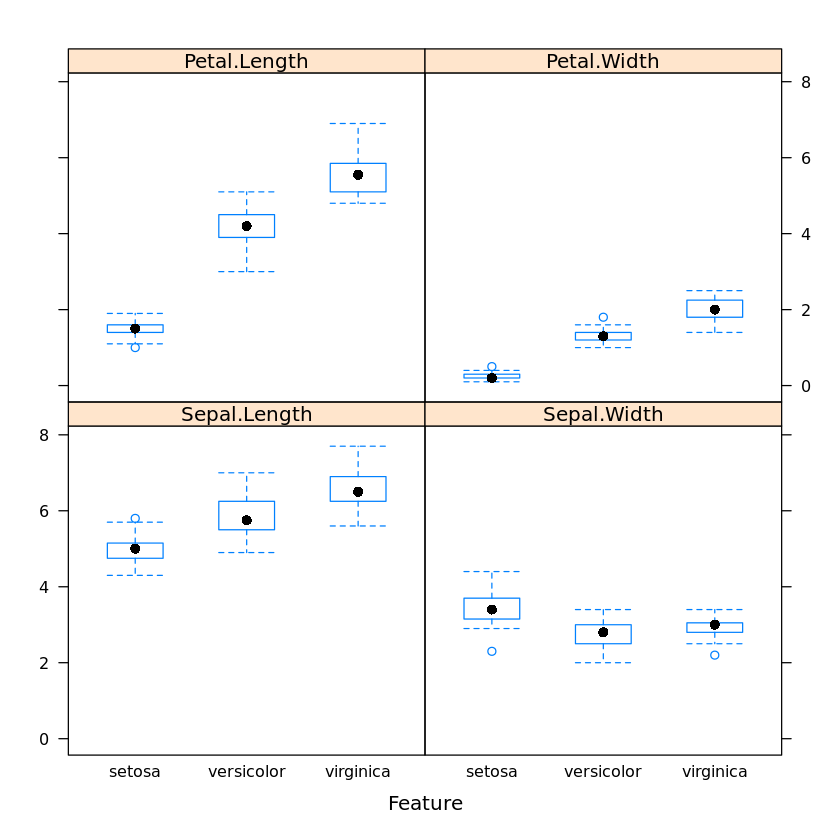

In [15]:
featurePlot(x=x, y=y, plot="box")

# Distribution comparison 

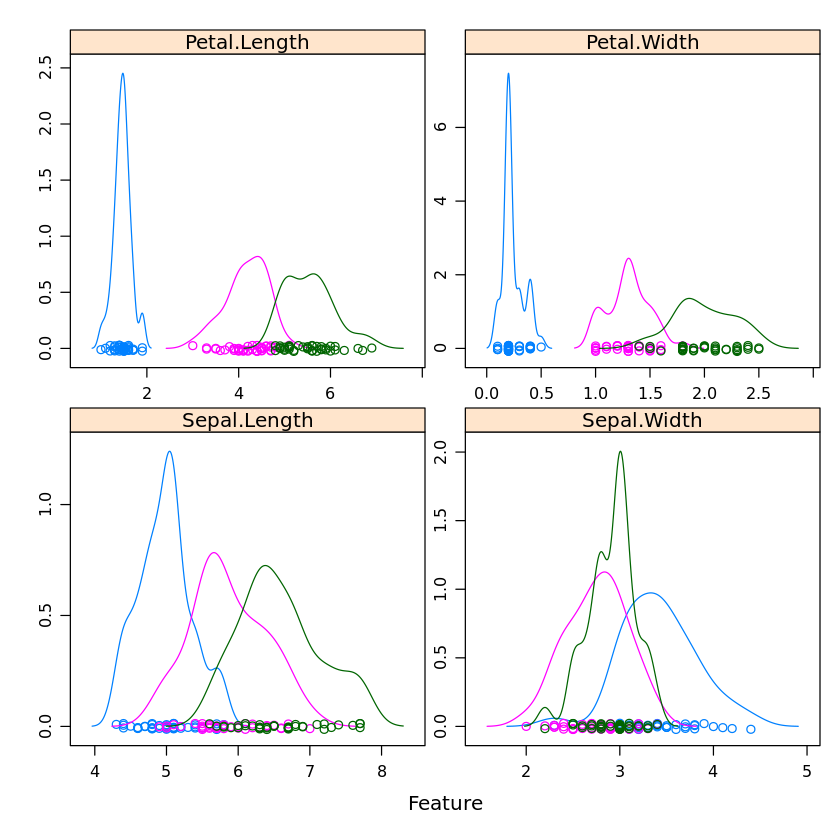

In [16]:
scales <- list(x=list(relation="free"), y=list(relation="free"))
featurePlot(x=x, y=y, plot="density", scales=scales)

**split data into 10 parts**

In [17]:
control <- trainControl(method="cv", number=10)
metric <- "Accuracy"

# Use of 5 different algorithms to analyse data

In [18]:
# a) linear algorithms
set.seed(7)
fit.lda <- train(Species~., data=dataset, method="lda", metric=metric, trControl=control)
# b) nonlinear algorithms
# CART
set.seed(7)
fit.cart <- train(Species~., data=dataset, method="rpart", metric=metric, trControl=control)
# kNN
set.seed(7)
fit.knn <- train(Species~., data=dataset, method="knn", metric=metric, trControl=control)
# c) advanced algorithms
# SVM
set.seed(7)
fit.svm <- train(Species~., data=dataset, method="svmRadial", metric=metric, trControl=control)
# Random Forest
set.seed(7)
fit.rf <- train(Species~., data=dataset, method="rf", metric=metric, trControl=control)

In [21]:
# summarize accuracy of models
results <- resamples(list(lda=fit.lda, cart=fit.cart, knn=fit.knn, svm=fit.svm, rf=fit.rf))
summary(results)


Call:
summary.resamples(object = results)

Models: lda, cart, knn, svm, rf 
Number of resamples: 10 

Accuracy 
          Min. 1st Qu. Median      Mean 3rd Qu. Max. NA's
lda  0.9166667  0.9375      1 0.9750000       1    1    0
cart 0.9166667  1.0000      1 0.9833333       1    1    0
knn  0.9166667  1.0000      1 0.9833333       1    1    0
svm  0.8333333  0.9375      1 0.9666667       1    1    0
rf   0.9166667  0.9375      1 0.9750000       1    1    0

Kappa 
      Min. 1st Qu. Median   Mean 3rd Qu. Max. NA's
lda  0.875 0.90625      1 0.9625       1    1    0
cart 0.875 1.00000      1 0.9750       1    1    0
knn  0.875 1.00000      1 0.9750       1    1    0
svm  0.750 0.90625      1 0.9500       1    1    0
rf   0.875 0.90625      1 0.9625       1    1    0


# Visualizing Accuarcy of each model

In [22]:
results <- resamples(list(lda=fit.lda, cart=fit.cart, knn=fit.knn, svm=fit.svm, rf=fit.rf))
summary(results)


Call:
summary.resamples(object = results)

Models: lda, cart, knn, svm, rf 
Number of resamples: 10 

Accuracy 
          Min. 1st Qu. Median      Mean 3rd Qu. Max. NA's
lda  0.9166667  0.9375      1 0.9750000       1    1    0
cart 0.9166667  1.0000      1 0.9833333       1    1    0
knn  0.9166667  1.0000      1 0.9833333       1    1    0
svm  0.8333333  0.9375      1 0.9666667       1    1    0
rf   0.9166667  0.9375      1 0.9750000       1    1    0

Kappa 
      Min. 1st Qu. Median   Mean 3rd Qu. Max. NA's
lda  0.875 0.90625      1 0.9625       1    1    0
cart 0.875 1.00000      1 0.9750       1    1    0
knn  0.875 1.00000      1 0.9750       1    1    0
svm  0.750 0.90625      1 0.9500       1    1    0
rf   0.875 0.90625      1 0.9625       1    1    0


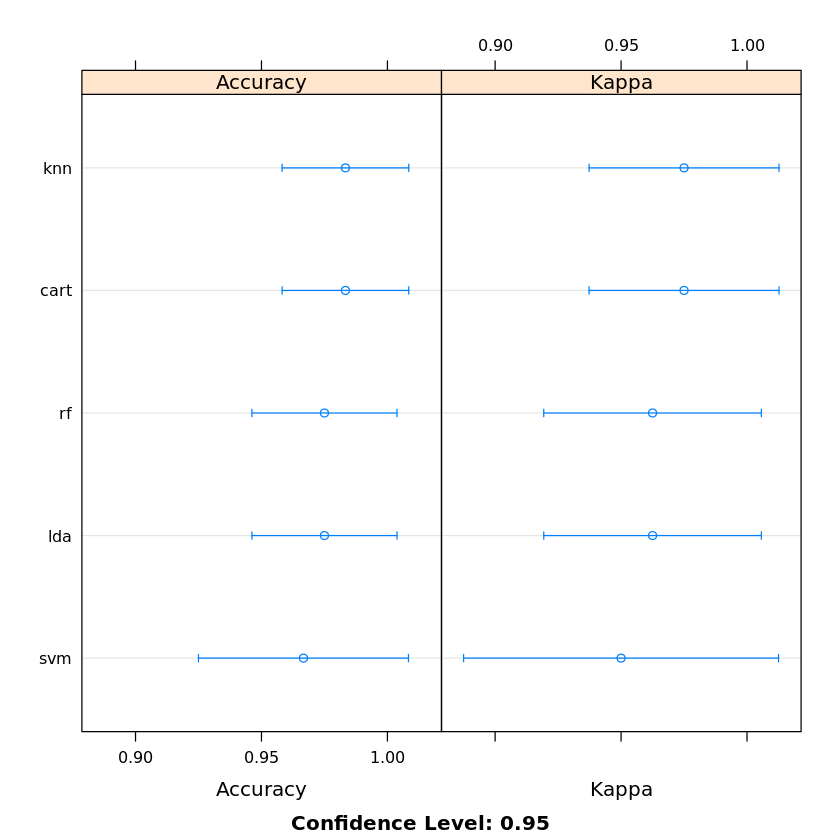

In [23]:
dotplot(results)

**LDA was the most accurate**

In [24]:
print(fit.lda)

Linear Discriminant Analysis 

120 samples
  4 predictor
  3 classes: 'setosa', 'versicolor', 'virginica' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 108, 108, 108, 108, 108, 108, ... 
Resampling results:

  Accuracy  Kappa 
  0.975     0.9625



In [25]:
predictions <- predict(fit.lda, validation)
confusionMatrix(predictions, validation$Species)

Confusion Matrix and Statistics

            Reference
Prediction   setosa versicolor virginica
  setosa         10          0         0
  versicolor      0          9         0
  virginica       0          1        10

Overall Statistics
                                          
               Accuracy : 0.9667          
                 95% CI : (0.8278, 0.9992)
    No Information Rate : 0.3333          
    P-Value [Acc > NIR] : 2.963e-13       
                                          
                  Kappa : 0.95            
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: setosa Class: versicolor Class: virginica
Sensitivity                 1.0000            0.9000           1.0000
Specificity                 1.0000            1.0000           0.9500
Pos Pred Value              1.0000            1.0000           0.9091
Neg Pred Value              1.0000            0.9524           1.0000
P